# [ATM 623: Climate Modeling](../index.ipynb)

[Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany

# Lecture 2: The zero-dimensional energy balance model

## Warning: content out of date and not maintained

You really should be looking at [The Climate Laboratory book](https://brian-rose.github.io/ClimateLaboratoryBook) by Brian Rose, where all the same content (and more!) is kept up to date.

***Here you are likely to find broken links and broken code.***

### About these notes:

This document uses the interactive [`Jupyter notebook`](https://jupyter.org) format. The notes can be accessed in several different ways:

- The interactive notebooks are hosted on `github` at https://github.com/brian-rose/ClimateModeling_courseware
- The latest versions can be viewed as static web pages [rendered on nbviewer](http://nbviewer.ipython.org/github/brian-rose/ClimateModeling_courseware/blob/master/index.ipynb)
- A complete snapshot of the notes as of May 2017 (end of spring semester) are [available on Brian's website](http://www.atmos.albany.edu/facstaff/brose/classes/ATM623_Spring2017/Notes/index.html).

[Also here is a legacy version from 2015](http://www.atmos.albany.edu/facstaff/brose/classes/ATM623_Spring2015/Notes/index.html).

Many of these notes make use of the `climlab` package, available at https://github.com/brian-rose/climlab

## Contents

1. [Recap of global energy budget](#section1)
2. [Tuning radiative fluxes to the observations](#section2)
3. [Equilibrium temperature](#section3)
4. [A time-dependent Energy Balance Model](#section4)
5. [Representing time derivatives on a computer](#section5)
6. [Numerical solution of the Energy Balance Model](#section6)
7. [Analytical solution of the Energy Balance Model: e-folding time and feedback parameter](#section7)
8. [Summary and take-away messages](#section8)

In [1]:
#  Ensure compatibility with Python 2 and 3
from __future__ import print_function, division

____________
<a id='section1'></a>

## 1. Recap of the global energy budget
____________

Let's look again at the observations:

![Observed global energy flows from Trenberth and Fasullo (2012)](../images/GlobalEnergyBudget.png)

____________
<a id='section1'></a>

## 2. Tuning radiative fluxes to the observations
____________

### Recap of our simple greenhouse model

Last class we introduced a very simple model for the **OLR** or Outgoing Longwave Radiation to space:

$$ \text{OLR} = \tau \sigma T_s^4 $$

where $\tau$ is the **transmissivity** of the atmosphere, a number less than 1 that represents the greenhouse effect of Earth's atmosphere.

We also tuned this model to the observations by choosing $ \tau \approx 0.61$.

More precisely:

In [2]:
OLRobserved = 238.5  # in W/m2
sigma = 5.67E-8  # S-B constant
Tsobserved = 288.  # global average surface temperature
tau = OLRobserved / sigma / Tsobserved**4  # solve for tuned value of transmissivity
print(tau)

0.6114139923687016


Let's now deal with the shortwave (solar) side of the energy budget.

### Absorbed Shortwave Radiation (ASR) and Planetary Albedo

Let's define a few terms.

#### Global mean insolation

From the observations, the area-averaged incoming solar radiation or **insolation** is 341.3 W m$^{-2}$.

Let's denote this quantity by $Q$.

In [3]:
Q = 341.3  # the insolation

#### Planetary albedo

Some of the incoming radiation is not absorbed at all but simply reflected back to space. Let's call this quantity $F_{reflected}$

From observations we have:

In [4]:
Freflected = 101.9  #  reflected shortwave flux in W/m2


The **planetary albedo** is the fraction of $Q$ that is reflected.

We will denote the planetary albedo by $\alpha$.

From the observations:

In [5]:
alpha = Freflected / Q
print(alpha)

0.29856431292118374


That is, about 30% of the incoming radiation is reflected back to space.

#### Absorbed Shortwave Radiation

The **Absorbed Shortwave Radiation** or ASR is the part of the incoming sunlight that is *not* reflected back to space, i.e. that part that is absorbed somewhere within the Earth system.

Mathematically we write

$$ \text{ASR} = Q - F_{reflected} = (1-\alpha) Q $$

From the observations:

In [6]:
ASRobserved = Q - Freflected
print(ASRobserved)

239.4


As we noted last time, this number is *just slightly greater* than the observed OLR of 238.5 W m$^{-2}$.

____________
<a id='section3'></a>

## 3. Equilibrium temperature
____________


*This is one of the central concepts in climate modeling.*

The Earth system is in **energy balance** when energy in = energy out, i.e. when

$$ \text{ASR} = \text{OLR} $$

We want to know:

- What surface temperature do we need to have this balance?
- By how much would the temperature change in response to other changes in Earth system?
    - Changes in greenhouse gases
    - Changes in cloudiness
    - etc.




With our simple greenhouse model, we can get an **exact solution** for the equilibrium temperature.

First, write down our statement of energy balance:

$$ (1-\alpha) Q = \tau \sigma T_s^4 $$

Rearrange to solve for $T_s$:

$$ T_s^4 = \frac{(1-\alpha) Q}{\tau \sigma} $$

and take the fourth root, denoting our **equilibrium temperature** as $T_{eq}$:

$$ T_{eq} = \left( \frac{(1-\alpha) Q}{\tau \sigma} \right)^\frac{1}{4} $$

Plugging the observed values back in, we compute:

In [7]:
#  define a reusable function!
def equilibrium_temperature(alpha,Q,tau):
    return ((1-alpha)*Q/(tau*sigma))**(1/4)

Teq_observed = equilibrium_temperature(alpha,Q,tau)
print(Teq_observed)

288.27131447889224


And this equilibrium temperature is *just slightly warmer* than 288 K.  Why?

### A climate change scenario

Suppose that, due to global warming (changes in atmospheric composition and subsequent changes in cloudiness):

- The longwave transmissitivity decreases to $\tau = 0.57$ 
- The planetary albedo increases to $\alpha = 0.32$

What is the new equilibrium temperature?

For this very simple model, we can work out the answer exactly:

In [8]:
Teq_new = equilibrium_temperature(0.32,Q,0.57)
#  an example of formatted print output, limiting to two or one decimal places
print('The new equilibrium temperature is {:.2f} K.'.format(Teq_new))
print('The equilibrium temperature increased by about {:.1f} K.'.format(Teq_new-Teq_observed))

The new equilibrium temperature is 291.10 K.
The equilibrium temperature increased by about 2.8 K.


Most climate models are more complicated mathematically, and solving directly for the equilibrium temperature will not be possible! 

Instead, we will be able to use the model to calculate the terms in the energy budget (ASR and OLR).

### Python exercise

- Write Python functions to calculate ASR and OLR for *arbitrary parameter values*.
- Verify the following:
    - With the new parameter values but the old temperature T = 288 K, is ASR greater or lesser than OLR? 
    - Is the Earth gaining or losing energy?
    - How does your answer change if T = 295 K (or any other temperature greater than 291 K)?

In [10]:
def ASR(alpha,Q):
    asr = (1-alpha)*Q
    return asr

def OLR(tau,sigma,Ts):
    olr = tau*sigma*Ts**4
    return olr
 
    
    

In [16]:
tau = 0.57 # transmissivity of the atmosphere
alpha = 0.32 # planetary albedo (the fraction of Q reflected back to space)
sigma = 5.67E-8 # Stefan-Boltzmann constant
Ts = 295

ASRobs = ASR(alpha,Q)
OLRobs = OLR(tau,sigma,Ts)

print ('With T=%.2f K, ASR=%.2f, OLR=%.2f' %(Ts,ASRobs,OLRobs))


With T=295.00 K, ASR=232.08, OLR=244.76


____________
<a id='section4'></a>

## 4. A time-dependent Energy Balance Model
____________

The above exercise shows us that if some properties of the climate system change in such a way that the **equilibrium temperature goes up**, then the Earth system *receives more energy from the sun than it is losing to space*. The system is **no longer in energy balance**.

The temperature must then increase to get back into balance. The increase will not happen all at once! It will take time for energy to accumulate in the climate system. We want to model this **time-dependent adjustment** of the system.

In fact almost all climate models are **time-dependent**, meaning the model calculates **time derivatives** (rates of change) of climate variables.

### An energy balance equation

We will write the **total energy budget** of the Earth system as

$$ \frac{dE}{dt} = (1-\alpha) Q - OLR $$

Note: **This is a generically true statement.** We have just defined some terms, and made the (very good) assumption that the only significant energy sources are radiative exchanges with space.

**This equation is the starting point for EVERY CLIMATE MODEL.**

But so far, we don’t actually have a MODEL. We just have a statement of a budget. To use this budget to make a model, we need to relate terms in the budget to state variables of the atmosphere-ocean system.

For now, the state variable we are most interested in is **temperature** – because it is directly connected to the physics of each term above.



If we now suppose that 

$$ E = C T_s $$

where $T_s$ is the **global mean surface temperature**, and $C$ is a constant – the **effective heat capacity** of the atmosphere- ocean column.

then our budget equation becomes:


$$ C \frac{dT_s}{dt} = \text{ASR} - \text{OLR} $$

where

- $C$ is the **heat capacity** of Earth system, in units of J m$^{-2}$ K$^{-1}$.
- $\frac{dT}{dt}$ is the rate of change of global average surface temperature.

By adopting this equation, we are assuming that the energy content of the Earth system (atmosphere, ocean, ice, etc.) is *proportional to surface temperature*.

Important things to think about:

- Why is this a sensible assumption?
- What determines the heat capacity $C$?
- What are some limitations of this assumption?


For our purposes here we are going to use a value of C equivalent to heating 100 meters of water:

$$C = c_w \rho_w H$$

where 

$c_w = 4 \times 10^3$ J kg$^{-1}$ $^\circ$C$^{-1}$ is the specific heat of water,

$\rho_w = 10^3$ kg m$^{-3}$ is the density of water, and

$H$ is an effective depth of water that is heated or cooled.

In [17]:
c_w = 4E3  #  Specific heat of water in J/kg/K
rho_w = 1E3  #  Density of water in kg/m3
H = 100.   #  Depth of water in m
C = c_w * rho_w * H   #  Heat capacity of the model 
print('The effective heat capacity is {:.1e} J/m2/K'.format(C))

The effective heat capacity is 4.0e+08 J/m2/K


### Solving the energy balance model

This is a first-order Ordinary Differential Equation (ODE) for $T_s$ as a function of time. It is also our very first climate model.

To solve it (i.e. see how $T_s$ evolves from some specified initial condition) we have two choices:

1. Solve it analytically
2. Solve it numerically

Option 1 (analytical) will usually not be possible because the equations will typically be too complex and non-linear. This is why computers are our best friends in the world of climate modeling.

HOWEVER it is often useful and instructive to simplify a model down to something that is analytically solvable when possible. Why? Two reasons:

1. Analysis will often yield a deeper understanding of the behavior of the system
2. Gives us a benchmark against which to test the results of our numerical solutions.

____________
<a id='section5'></a>

## 5. Representing time derivatives on a computer
____________

Recall that the derivative is the **instantaneous rate of change**. It is defined as 

$$ \frac{dT}{dt} = \lim_{\Delta t\rightarrow 0}⁡ \frac{\Delta T}{\Delta t}$$

- **On the computer there is no such thing as an instantaneous change.** 
- We are always dealing with *discrete quantities*.
- So we approximate the derivative with $\Delta T/ \Delta t$. 
- So long as we take the time interval $\Delta t$ "small enough", the approximation is valid and useful.
- (The meaning of "small enough" varies widely in practice. Let's not talk about it now)

So we write our model as

$$ C  \frac{\Delta T}{\Delta t} \approx \text{ASR} - \text{OLR}$$

where $\Delta T$ is the **change in temperature predicted by our model** over a short time interval $\Delta t$.

We can now use this to **make a prediction**: 

Given a current temperature $T_1$ at time $t_1$, what is the temperature $T_2$ at a future time $t_2$?

We can write

$$ \Delta T = T_2-T_1 $$
$$ \Delta t = t_2-t_1 $$

and so our model says

$$ C  \frac{T_2-T_1}{\Delta t} = \text{ASR} - \text{OLR} $$

Which we can rearrange to **solve for the future temperature**:

$$ T_2 = T_1 + \frac{\Delta t}{C} \left( \text{ASR} - \text{OLR}(T_1) \right)  $$

We now have a formula with which to make our prediction!

Notice that we have written the OLR as a *function of temperature*. We will use the current temperature $T_1$ to compute the OLR, and use that OLR to determine the future temperature.

____________
<a id='section6'></a>

## 6. Numerical solution of the Energy Balance Model
____________

The quantity $\Delta t$ is called a **timestep**. It is the smallest time interval represented in our model.

Here we're going to use a timestep of 1 year:

In [18]:
dt = 60. * 60. * 24. * 365.   # one year expressed in seconds

In [20]:
def ASR(alpha,Q):
    asr = (1-alpha)*Q
    return asr

def OLR(tau,sigma,Ts):
    olr = tau*sigma*Ts**4
    return olr

In [21]:
dt = 60. * 60. * 24. * 365.   # one year expressed in seconds
tau = 0.57 # transmissivity of the atmosphere
alpha = 0.32 # planetary albedo (the fraction of Q reflected back to space)
sigma = 5.67E-8 # Stefan-Boltzmann constant
Q = 341.3  # the insolation
Ts = 295

In [24]:
# Try a single timestep, assuming we have working functions for ASR and OLR
T1 = 288.
T2 = T1 + dt / C * ( ASR(alpha,Q) - OLR(tau,sigma,T1) )
print(T2)

288.7678026614462


What happened? Why?

Try another timestep

In [25]:
T1 = T2
T2 = T1 + dt / C * ( ASR(alpha,Q) - OLR(tau,sigma,T1) )
print(T2)

289.3479210238739


Warmed up again, but by a smaller amount.

But this is tedious typing. Time to **define a function** to make things easier and more reliable:

In [26]:
def step_forward(T):
    return T + dt / C * ( ASR(alpha,Q) - OLR(tau,sigma,T) )

Try it out with an arbitrary temperature:

In [27]:
step_forward(300.)

297.658459884

Notice that our function calls other functions and variables we have already defined.

#### Python fact 10: Functions can access variables and other functions defined outside of the function. 

This is both very useful and occasionally confusing.

Now let's really harness the power of the computer by **making a loop** (and storing values in arrays):

In [31]:
import numpy as np

numsteps = 50
Tsteps = np.zeros(numsteps+1)
Years = np.zeros(numsteps+1)
Tsteps[0] = 288. 
for n in range(numsteps):
    Years[n+1] = n+1
    Tsteps[n+1] = step_forward( Tsteps[n] )
print(Tsteps)

[288.         288.76780266 289.34792102 289.78523685 290.11433323
 290.36166675 290.54736768 290.68669049 290.79115953 290.86946109
 290.92813114 290.97208122 291.00499865 291.02964965 291.0481083
 291.06192909 291.07227674 291.08002371 291.08582346 291.09016532
 291.09341571 291.09584897 291.09767051 291.0990341  291.10005487
 291.100819   291.10139102 291.10181922 291.10213977 291.10237972
 291.10255934 291.10269381 291.10279446 291.10286981 291.10292622
 291.10296844 291.10300005 291.10302371 291.10304142 291.10305468
 291.1030646  291.10307203 291.10307759 291.10308176 291.10308487
 291.10308721 291.10308895 291.10309026 291.10309124 291.10309197
 291.10309252]


What did we just do?

- Created an array of zeros
- set the initial temperature to 288 K
- repeated our time step 20 times. 
- Stored the results of each time step into the array.

#### Python fact 11: the `for` statement executes a statement (or series of statements) a specified number of times (a loop!)

#### Python fact 12: Use square bracket [ ] to refer to elements of an array or list. Use round parentheses ( ) for function arguments. 

### Plotting the result

Now let's draw a picture of our result!

In [32]:
# a special instruction for the Jupyter notebook
#   Display all plots inline in the notebook
%matplotlib inline  
#  import the plotting package
import matplotlib.pyplot as plt

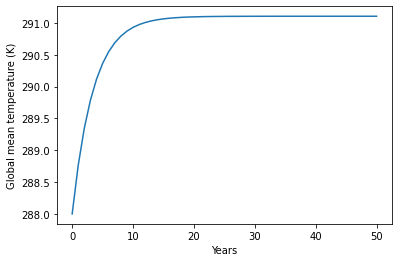

In [33]:
plt.plot( Years, Tsteps )
plt.xlabel('Years')
plt.ylabel('Global mean temperature (K)');

Note how the temperature *adjusts smoothly toward the equilibrium temperature*, that is, the temperature at which
ASR = OLR.

**If the planetary energy budget is out of balance, the temperature must change so that the OLR gets closer to the ASR!**

The adjustment is actually an *exponential decay* process: The rate of adjustment slows as the temperature approaches equilibrium. 

The temperature gets very very close to equilibrium but never reaches it exactly.

#### Python fact 13: We can easily make simple graphs with the function `plt.plot(x,y)`, where `x` and `y` are arrays of the same size. But we must import it first. 

This is actually not native Python, but uses a special graphics library called `matplotlib`. 

Just about all of our notebooks will start with this:
```
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
```

____________
<a id='section7'></a>

## 7. Analytical solution of the Energy Balance Model: e-folding time and feedback parameter
____________

### Equilibrium solutions

We've already seen that the equilibrium solution of the model is

$$ T_{eq} = \left( \frac{(1-\alpha) Q}{\tau \sigma} \right)^\frac{1}{4} $$

and tuned the model parameter based on this relationship.

We are going to **linearize the equation** for small perturbations away from this equilibrium.

Let $T_s = T_{eq} + T_s^\prime$ and restrict our solution to $T_s^\prime << T_{eq}$.

Note this this is not a big restriction! For example, a 10 degree warming or cooling is just $\pm$3.4% of the absolute equilibrium temperature.

### Linearizing the governing equation

Now use a first-order Taylor series expansion to write

$$ \text{OLR} = \tau \sigma T_s^4 $$

$$OLR = \tau \sigma T_s^4 = \tau \sigma \left( T_{eq} + T_s^\prime \right)^4  \approx \tau \sigma \left( T_{eq}^4 + 4 T_{eq}^3 T_s^\prime \right) $$

and the budget for the perturbation temperature thus becomes

$$C \frac{d T_s^\prime}{d t} = -\lambda_0 T_s^\prime$$

where we define

$$\lambda_0 = 4 \tau \sigma T_{eq}^3 $$

Putting in our observational values, we get 

In [34]:
lambda_0 = 4 * sigma * tau * Teq_observed**3
#  This is an example of formatted text output in Python
print( 'lambda_0 = {:.2f} W m-2 K-1'.format(lambda_0)  )

lambda_0 = 3.10 W m-2 K-1


This is actually our first estimate of what is often called the **Planck feedback**. It is the tendency for a warm surface to cool by increased longwave radiation to space. 

It may also be refered to as the "no-feedback" climate response parameter. As we will see, $\lambda_0$ quantifies the sensitivity of the climate system in the absence of any actual feedback processes.

### Solve the linear ODE

Now define

$$ t^* = \frac{C}{\lambda_0}  $$

This is a positive constant with dimensions of time (seconds). With these definitions the temperature evolves according to

$$ \frac{d T_s^\prime}{d t} = - \frac{T_s^\prime}{t^*}$$

This is one of the simplest ODEs. Hopefully it looks familiar to most of you. It is the equation for an **exponential decay** process. 

We can easily solve for the temperature evolution by integrating from an initial condition $T_s^\prime(0)$:

$$ \int_{T_s^\prime(0)}^{T_s^\prime(t)} \frac{d T_s^\prime}{T_s^\prime} = -\int_0^t  \frac{dt}{t^*}$$

$$\ln \bigg( \frac{T_s^\prime(t)}{T_s^\prime(0)} \bigg) = -\frac{t}{t^*}$$

$$T_s^\prime(t) = T_s^\prime(0) \exp \bigg(-\frac{t}{t^*} \bigg)$$

I hope that the mathematics is straightforward for everyone in this class. If not, go through it carefully and make sure you understand each step.

### e-folding time for relaxation of global mean temperature

Our model says that surface temperature will relax toward its equilibrium value over a characteristic time scale $t^*$. This is an **e-folding time** – the time it takes for the perturbation to decay by a factor $1/e = 0.37$

*What should this timescale be for the climate system?*

To estimate $t^*$ we need a value for the effective heat capacity $C$.

Our "quick and dirty" estimate above used 100 meters of water to set this heat capacity.

#### What is the right choice for water depth $H$? 

That turns out to be an interesting and subtle question. It depends very much on the timescale of the problem

- days?
- years?
- decades?
- millenia?

We will revisit this question later in the course. For now, let’s just continue assuming $H = 100$ m (a bit deeper than the typical depth of the surface mixed layer in the oceans).

Now calculate the e-folding time for the surface temperature:

In [35]:
tstar = C / lambda_0   #  Calculated value of relaxation time constant
seconds_per_year = 60.*60.*24.*365.
print( 'The e-folding time is {:1.2e} seconds or about {:1.0f} years.'.format(tstar, tstar / seconds_per_year))

The e-folding time is 1.29e+08 seconds or about 4 years.


This is a rather fast timescale relative to other processes that can affect the planetary energy budget. 

**But notice that the climate feedback parameter $\lambda$ is smaller, the timescale gets longer.**  We will come back to this later.

____________
<a id='section8'></a>

## 8. Summary and take-away messages
____________

- We looked at the flows of energy in and out of the Earth system. 
- These are determined by radiation at the top of the Earth's atmosphere.
- Any imbalance between shortwave absorption (ASR) and longwave emission (OLR) drives a change in temperature
- Using this idea, we built a climate model!
- This **Zero-Dimensional Energy Balance Model** solves for the global, annual mean surface temperature $T_s$
- Two key assumptions:
    - Energy content of the Earth system varies proportionally to $T_s$
    - The OLR increases as $\tau \sigma T_s^4$ (our simple greenhouse model)
- Earth (or any planet) has a well-defined **equilibrium temperature** at which ASR = OLR, because of the *temperature dependence of the outgoing longwave radiation*.
- The system will tend to relax toward its equilibrium temperature on an $e$-folding timescale that depends on 
    - (1) radiative feedback processes, and 
    - (2) effective heat capacity.
- In our estimate, this e-folding time is relatively short. *In the absence of other processes that can either increase the heat capacity or lower (in absolute value) the feedback parameter, the Earth would never be very far out of energy balance.*
- We will quantify this statement more as the term progresses.

<div class="alert alert-success">
[Back to ATM 623 notebook home](../index.ipynb)
</div>

____________
## Version information
____________


In [36]:
%load_ext version_information
%version_information numpy, matplotlib

ModuleNotFoundError: No module named 'version_information'

____________

## Credits

The author of this notebook is [Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany.

It was developed in support of [ATM 623: Climate Modeling](http://www.atmos.albany.edu/facstaff/brose/classes/ATM623_Spring2015/), a graduate-level course in the [Department of Atmospheric and Envionmental Sciences](http://www.albany.edu/atmos/index.php)

Development of these notes and the [climlab software](https://github.com/brian-rose/climlab) is partially supported by the National Science Foundation under award AGS-1455071 to Brian Rose. Any opinions, findings, conclusions or recommendations expressed here are mine and do not necessarily reflect the views of the National Science Foundation.
____________